# Data Exploration

In [1]:
''' Needed libraries '''

import numpy as np # For dataset manipulation
import matplotlib.pyplot as plt # For plotting
import os, sys # For filepaths

In [2]:
''' Add the datasets and libraries to the system path '''

# Find the path to the datasets
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
home_directory = os.path.dirname(parent_directory)
datasets_path = os.path.join(home_directory, 'Datasets')

# Add them both to the system path
sys.path.append(datasets_path)

In [3]:
''' Load the dataset '''

dataset = np.load(os.path.join(datasets_path, 'fashion_train.npy'))
print("Dataset shape: ", dataset.shape)

Dataset shape:  (10000, 785)


In [4]:
''' Divide the dataset into images and labels  '''

images = dataset[:, :-1]  # Define the images as all columns except the last one
labels = dataset[:, -1] # Define the labels as the last column

In [5]:
''' Dictionary for the labels '''

labels_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}


# Export dictionary to use in other notebooks
np.save(os.path.join(datasets_path, 'labels_dict.npy'), labels_dict)

Label:  3 Dress


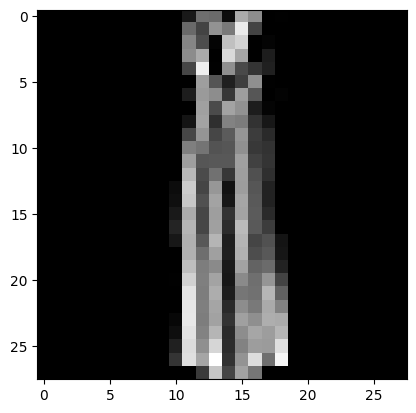

In [6]:
''' Plot a random image from the dataset '''

index = np.random.randint(0, len(images))
image = images[index]
label = labels[index]
label_name = labels_dict[label]
print("Label: ", label, label_name)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.show()

Class 0: T-shirt/top - 2033
Class 1: Trouser - 1947
Class 2: Pullover - 2001
Class 3: Dress - 2005
Class 4: Shirt - 2014


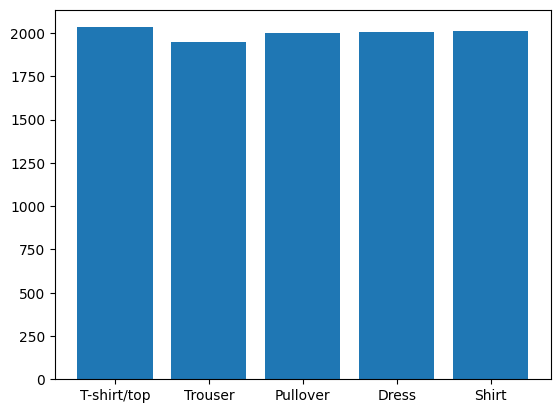

In [7]:
''' Plotting distribution of labels '''

# Count the number of images for each label
unique, counts = np.unique(labels, return_counts=True)

# Print the distribution
for i in unique:
    print(f"Class {i}: {labels_dict[i]} - {counts[i]}")

# Plot the distribution
plt.bar(unique, counts)
plt.xticks(unique, [labels_dict[i] for i in unique])
plt.show()

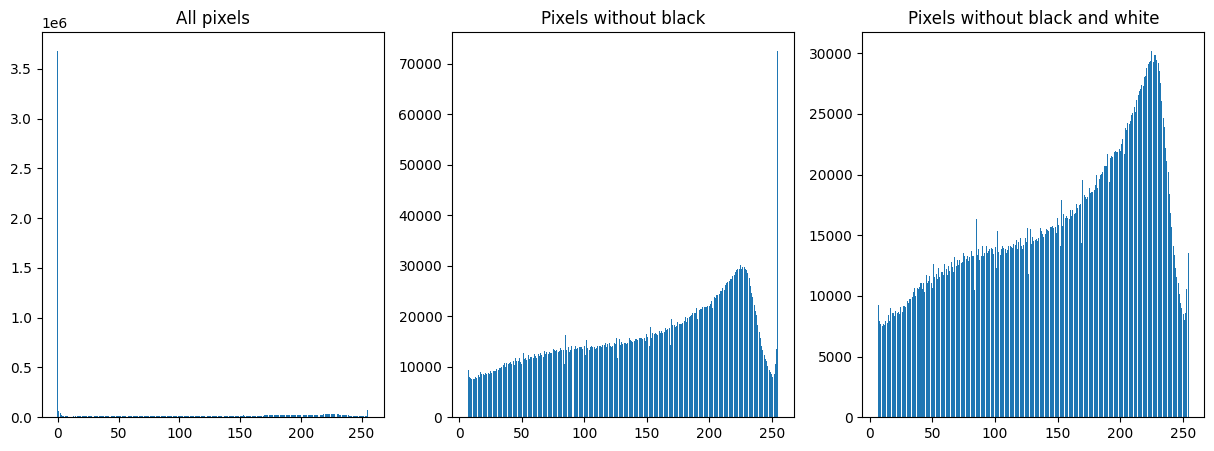

In [8]:
''' Plotting distribution of pixels '''

# Count the number of pixels for each value
unique, counts = np.unique(images, return_counts=True)

# Remove almost fully black pixels (value < 7)
unique1 = unique[7:]
counts1 = counts[7:]

# Remove fully white pixels (value 255)
unique2 = unique1[:-1]
counts2 = counts1[:-1]

# Plot all 3 distributions in a single plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(unique, counts)
plt.title("All pixels")
plt.subplot(1, 3, 2)
plt.bar(unique1, counts1)
plt.title("Pixels without black")
plt.subplot(1, 3, 3)
plt.bar(unique2, counts2)
plt.title("Pixels without black and white")
plt.show()